<a href="https://colab.research.google.com/github/guanweijun/Guanweijun_AI_Learning/blob/main/Day1_PythonBasics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 基本类型与运算
a, b = 5, 2.5
print(type(a), type(b))
print(a / b)          # 得 2.0 → 自动 float

# str 拼接
name = "Colab"
print(f"Hello {name}!") #f字符串格式才会认大括号{}，不能省略


# list 切片
nums = [1, 2, 3, 4, 5]
print(nums[::-2]) #反转，list[start:stop:step]•start:起始索引（包含）stop:结束索引（不包含）step: 步长（默认为1)

<class 'int'> <class 'float'>
2.0
Hello Colab!
[5, 3, 1]


In [ ]:
def c2f(c):
    """摄氏→华氏"""
    return c * 9 / 5 + 32

for c in range(0, 101, 20):
    print(f"{c}°C = {c2f(c):.1f}°F") #冒号:表示开始格式说明 .1指定小数点后保留1位数字 f表示浮点数格式

0°C = 32.0°F
20°C = 68.0°F
40°C = 104.0°F
60°C = 140.0°F
80°C = 176.0°F
100°C = 212.0°F


In [3]:
import numpy as np
x = np.arange(0, 10, 0.5)      # 0–9.5 步长 0.5,支持浮点数
# 从0到9
# print(np.arange(10))  # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
# 从5到14
# print(np.arange(5, 15))  # array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
# 从0到20，步长为5
# print(np.arange(0, 21, 5))  # array([ 0,  5, 10, 15, 20])
# arange: 指定步长
# print(np.arange(0, 1, 0.2))  # array([0. , 0.2, 0.4, 0.6, 0.8])
# # linspace: 指定元素个数
# print(np.linspace(0, 1, 5))  # array([0. , 0.25, 0.5, 0.75, 1. ])

y = 3 * x + 2                  # 线性关系
noise = np.random.normal(0, 1, len(x)) #len(x) 表示获取数组 x 的长度（元素个数）
y_noisy = y + noise
print("前 5 个带噪声 y:", y_noisy[:5]) #[:]not[::]，从左开始读数到:停，第一个是开始，第二个结束，若两个冒号，第三个是步长

前 5 个带噪声 y: [2.14989247 4.79901066 5.42828654 7.43403193 7.83128139]


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25955 (\N{CJK UNIFIED IDEOGRAPH-6563}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28857 (\N{CJK UNIFIED IDEOGRAPH-70B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25311 (\N{CJK UNIFIED IDEOGRAPH-62DF}) missing from font(s) DejaVu Sans.
  fig.canvas

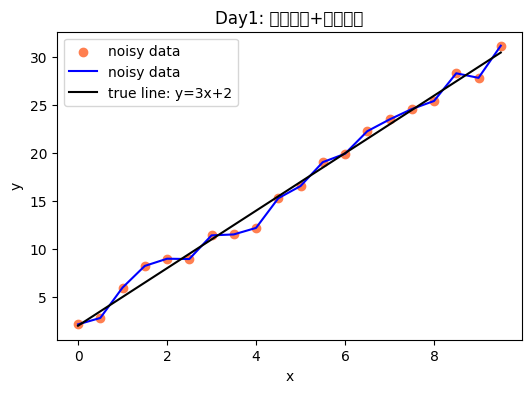

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(x, y_noisy, label='noisy data', color='coral')
plt.plot(x, y_noisy, label='noisy data', color='blue')
plt.plot(x, y, label='true line: y=3x+2', color='black')
plt.xlabel("x"); plt.ylabel("y"); plt.legend()
plt.title("Day1: 线性散点+拟合直线")
plt.show()

In [ ]:
y_pred = 3 * x + 2              # 假装模型预测 = 真值
mse = np.mean((y_noisy - y_pred)**2)
print("MSE =", mse)

MSE = 0.7182027682525118


In [7]:
import datetime; print("Day1 finished at:", datetime.datetime.now())

Day1 finished at: 2025-09-28 04:24:21.732948


In [29]:
import numpy as np

x = np.array([0.0, 1.0, 2.0, 3.0, 4.0])
y_true = 3.0 * x
np.random.seed(40)
y_noisy = y_true + np.random.normal(0, 0.5, size=x.shape)

w = 0.0
lr = 0.1  #学习率 0.5 太大，一步迈过“谷底”，每次都在对岸来回蹦，grad越蹦越远。0.1 先跑，稳就留；乱跳减半（0.01），慢就加半（0.3）
delta = 1e-4 # ① 抖动量 1x10**-4
for epoch in range(50):
    # ② 数值梯度：纯粹“试”出方向
    loss_right = np.mean((y_noisy - (w + delta) * x)**2)
    loss_left  = np.mean((y_noisy - (w - delta) * x)**2)
    grad = (loss_right - loss_left) / (2 * delta)

    w -= lr * grad                    # ③ 更新
    if epoch % 2 == 0:
        print(f"epoch {epoch:02d}: w={w:.3f}, grad={grad:.1f}")

epoch 00: w=3.478, grad=-34.8
epoch 02: w=2.922, grad=-1.4
epoch 04: w=2.899, grad=-0.1
epoch 06: w=2.899, grad=-0.0
epoch 08: w=2.899, grad=-0.0
epoch 10: w=2.899, grad=-0.0
epoch 12: w=2.899, grad=-0.0
epoch 14: w=2.899, grad=-0.0
epoch 16: w=2.899, grad=-0.0
epoch 18: w=2.899, grad=-0.0
epoch 20: w=2.899, grad=-0.0
epoch 22: w=2.899, grad=-0.0
epoch 24: w=2.899, grad=0.0
epoch 26: w=2.899, grad=0.0
epoch 28: w=2.899, grad=0.0
epoch 30: w=2.899, grad=0.0
epoch 32: w=2.899, grad=0.0
epoch 34: w=2.899, grad=0.0
epoch 36: w=2.899, grad=0.0
epoch 38: w=2.899, grad=0.0
epoch 40: w=2.899, grad=0.0
epoch 42: w=2.899, grad=0.0
epoch 44: w=2.899, grad=0.0
epoch 46: w=2.899, grad=0.0
epoch 48: w=2.899, grad=0.0
